In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Wine Quality dataset
#data_path = 'path_to_your_file/winequality-red.csv'  # Replace with your file path
data_path = 'C:\\Users\\Hp\\Documents\\CSE-4250\\Lab 12 PCA\winequality-red.csv'

df = pd.read_csv(data_path, delimiter=';')

# Convert quality scores to binary classification for simplicity
# Here, we consider wine with quality >= 6 as 'Good' (1) and < 6 as 'Bad' (0)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  # Let's reduce to 5 principal components
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy with PCA (5 components): {accuracy:.4f}")
print("\nExplained Variance Ratio of each component:", pca.explained_variance_ratio_)
print("Total Explained Variance by 5 components:", sum(pca.explained_variance_ratio_))


Accuracy with PCA (5 components): 0.8000

Explained Variance Ratio of each component: [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837]
Total Explained Variance by 5 components: 0.7952827473610367


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Wine Quality dataset
data_path = 'C:\\Users\\Hp\\Documents\\CSE-4250\\Lab 12 PCA\winequality-red.csv'
df = pd.read_csv(data_path, delimiter=';')

# Convert quality scores to binary classification for simplicity
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)




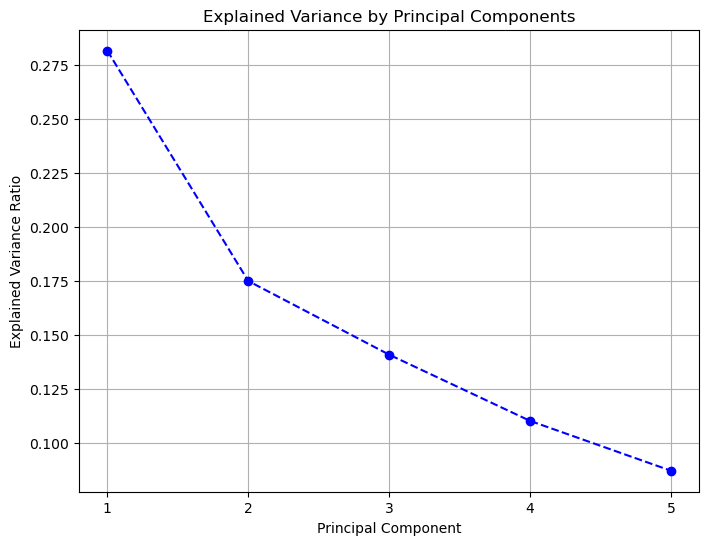

In [4]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()



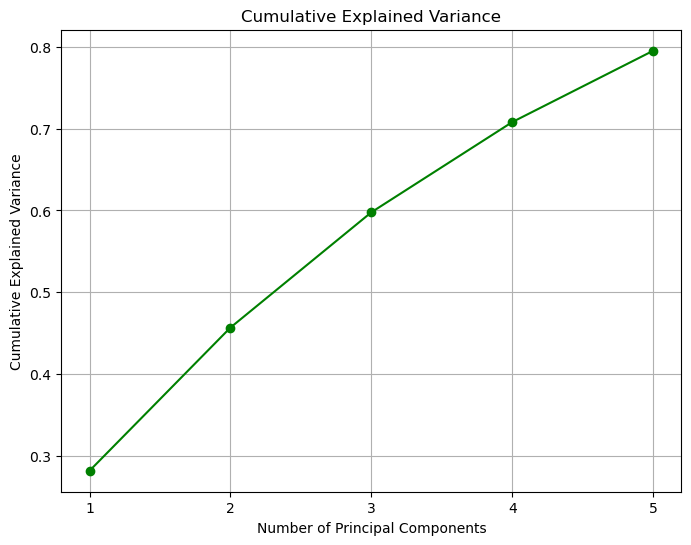

In [5]:
# Cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cumulative_explained_variance, marker='o', linestyle='-', color='g')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()



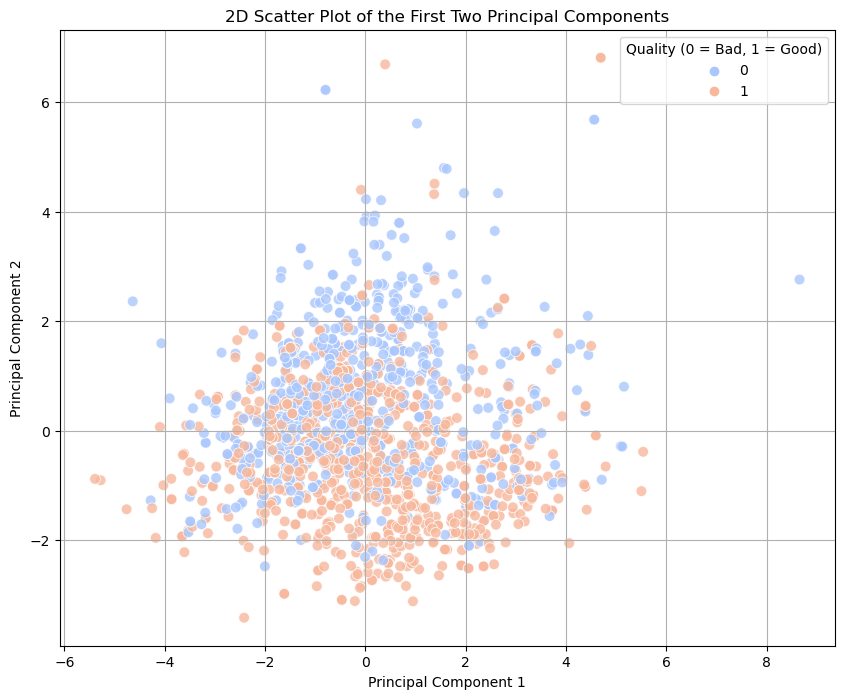

In [6]:
# 2D Scatter Plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', s=60, alpha=0.8)
plt.title('2D Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality (0 = Bad, 1 = Good)')
plt.grid(True)
plt.show()